In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model,Sequential

2023-07-01 21:04:59.123504: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/val'
test_data_dir = 'dataset/test'

In [45]:
# Set the image size and batch size
img_width, img_height = 224, 224
batch_size = 16

In [46]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,                 
    shear_range=0.2,                
    zoom_range=0.2,                 
    horizontal_flip=True            
)

In [47]:
# Rescaling for validation and test datasets
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [48]:
# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 418 images belonging to 5 classes.


In [49]:
#Load and preprocess the validation dataset
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 57 images belonging to 5 classes.


In [50]:
# Load and preprocess the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 125 images belonging to 5 classes.


In [51]:
# Set the number of training, validation, and test steps per epoch
train_steps_per_epoch = train_generator.samples // batch_size
validation_steps_per_epoch = validation_generator.samples // batch_size
test_steps_per_epoch = test_generator.samples // batch_size

In [80]:
input_shape = (224, 224, 3)
n_classes = 5

model_custom = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_custom.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_custom = model_custom.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=batch_size,
    verbose=1,
    epochs=10
)


Epoch 1/10


2023-07-01 22:33:07.323294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


27/27 [==============================] - ETA: 0s - loss: 23.1561 - accuracy: 0.2967

2023-07-01 22:34:11.665046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


27/27 [==============================] - 67s 2s/step - loss: 23.1561 - accuracy: 0.2967 - val_loss: 1.7145 - val_accuracy: 0.3509
Epoch 2/10
27/27 [==============================] - 62s 2s/step - loss: 1.6712 - accuracy: 0.4139 - val_loss: 1.2061 - val_accuracy: 0.4912
Epoch 3/10
27/27 [==============================] - 93s 3s/step - loss: 1.2163 - accuracy: 0.5048 - val_loss: 1.3028 - val_accuracy: 0.4737
Epoch 4/10
27/27 [==============================] - 65s 2s/step - loss: 1.1145 - accuracy: 0.5263 - val_loss: 1.4459 - val_accuracy: 0.3860
Epoch 5/10
27/27 [==============================] - 83s 3s/step - loss: 0.9940 - accuracy: 0.5909 - val_loss: 1.4753 - val_accuracy: 0.4386
Epoch 6/10
27/27 [==============================] - 62s 2s/step - loss: 0.9170 - accuracy: 0.6364 - val_loss: 1.3189 - val_accuracy: 0.4737
Epoch 7/10
27/27 [==============================] - 56s 2s/step - loss: 0.8671 - accuracy: 0.6794 - val_loss: 1.4766 - val_accuracy: 0.4386
Epoch 8/10
27/27 [============

In [102]:
model_custom.save('models.h5') 

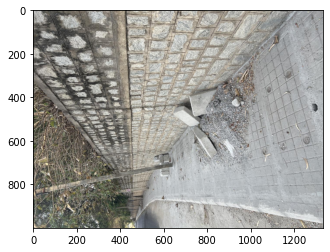

In [94]:
custom_image = Image.open(image_path)
plt.imshow(custom_image)

In [103]:
from tensorflow.keras.models import load_model

# Load the model from the saved .h5 file
model = load_model('models.h5')  # Replace with the actual path to the saved model


In [115]:
import cv2
image = cv2.imread('tests.jpg')
image = cv2.resize(image, (224, 224))
image = image / 255.0 
image = tf.expand_dims(image, axis=0)

# # Make a prediction
pred = model_custom.predict(image)

# # Get the predicted class index
class_index = tf.argmax(pred, axis=1)[0].numpy()

print(class_index)

1/1 [==============================] - 0s 69ms/step
1
